In [17]:
import os 
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
from dython.nominal import associations

In [2]:
TRAIN_DATA_PATH = r"../data/playground-series-s6e1/train.csv"
TEST_DATA_PATH = r"../data/playground-series-s6e1/test.csv"

In [3]:
train_df = pd.read_csv(TRAIN_DATA_PATH)
test_df = pd.read_csv(TEST_DATA_PATH)

print("="*60)
print("TRAIN DATASET INFO")
print("="*60)
print(f"Train Shape: {train_df.shape}")
print(f"Test Shape: {test_df.shape}")
print(f"\nTrain Row Count: {len(train_df):,}")
print(f"Test Row Count: {len(test_df):,}")
print(f"\nTotal Features (excluding id): {train_df.shape[1] - 2}")

TRAIN DATASET INFO
Train Shape: (630000, 13)
Test Shape: (270000, 12)

Train Row Count: 630,000
Test Row Count: 270,000

Total Features (excluding id): 11


In [4]:
print("\n" + "="*60)
print("FIRST 5 ROWS")
print("="*60)
display(train_df.head())

print("\n" + "="*60)
print("LAST 5 ROWS")
print("="*60)
display(train_df.tail())


FIRST 5 ROWS


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0



LAST 5 ROWS


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100
629999,629999,18,other,b.tech,3.94,75.3,yes,5.8,poor,online videos,low,easy,37.200


In [5]:
print("\n" + "="*60)
print("COLUMN NAMES")
print("="*60)
for i, col in enumerate(train_df.columns):
    print(f"{i+1}. {col}")

print("\n" + "="*60)
print("DATA TYPES")
print("="*60)
print(train_df.dtypes)

print("\n" + "="*60)
print("DETAILED INFO (.info())")
print("="*60)
train_df.info()


COLUMN NAMES
1. id
2. age
3. gender
4. course
5. study_hours
6. class_attendance
7. internet_access
8. sleep_hours
9. sleep_quality
10. study_method
11. facility_rating
12. exam_difficulty
13. exam_score

DATA TYPES
id                    int64
age                   int64
gender                  str
course                  str
study_hours         float64
class_attendance    float64
internet_access         str
sleep_hours         float64
sleep_quality           str
study_method            str
facility_rating         str
exam_difficulty         str
exam_score          float64
dtype: object

DETAILED INFO (.info())
<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  str    
 3   course            630000 non-null  

In [6]:
print("\n" + "="*60)
print("MISSING VALUES ANALYSIS - TRAIN")
print("="*60)
missing_train = train_df.isnull().sum()
missing_train_pct = (train_df.isnull().sum() / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_train,
    'Missing Percentage (%)': missing_train_pct.round(2)
})
print(missing_df)

print(f"\nTotal Missing Values: {train_df.isnull().sum().sum()}")

print("\n" + "="*60)
print("MISSING VALUES ANALYSIS - TEST")
print("="*60)
missing_test = test_df.isnull().sum()
missing_test_pct = (test_df.isnull().sum() / len(test_df)) * 100

missing_test_df = pd.DataFrame({
    'Missing Count': missing_test,
    'Missing Percentage (%)': missing_test_pct.round(2)
})
print(missing_test_df)
print(f"\nTotal Missing Values: {test_df.isnull().sum().sum()}")


MISSING VALUES ANALYSIS - TRAIN
                  Missing Count  Missing Percentage (%)
id                            0                     0.0
age                           0                     0.0
gender                        0                     0.0
course                        0                     0.0
study_hours                   0                     0.0
class_attendance              0                     0.0
internet_access               0                     0.0
sleep_hours                   0                     0.0
sleep_quality                 0                     0.0
study_method                  0                     0.0
facility_rating               0                     0.0
exam_difficulty               0                     0.0
exam_score                    0                     0.0

Total Missing Values: 0

MISSING VALUES ANALYSIS - TEST
                  Missing Count  Missing Percentage (%)
id                            0                     0.0
age           

In [7]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'id' in numerical_cols:
    numerical_cols.remove('id')
if 'exam_score' in numerical_cols:
    numerical_cols.remove('exam_score')

print("="*60)
print("CATEGORICAL VARIABLES")
print("="*60)
print(f"Total: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"  - {col}: {train_df[col].nunique()} unique values")

print("\n" + "="*60)
print("NUMERICAL VARIABLES")
print("="*60)
print(f"Total: {len(numerical_cols)}")
for col in numerical_cols:
    print(f"  - {col}")

print("\n" + "="*60)
print("TARGET VARIABLE")
print("="*60)
print("  - exam_score (continuous)")

CATEGORICAL VARIABLES
Total: 7
  - gender: 3 unique values
  - course: 7 unique values
  - internet_access: 2 unique values
  - sleep_quality: 3 unique values
  - study_method: 5 unique values
  - facility_rating: 3 unique values
  - exam_difficulty: 3 unique values

NUMERICAL VARIABLES
Total: 4
  - age
  - study_hours
  - class_attendance
  - sleep_hours

TARGET VARIABLE
  - exam_score (continuous)


/var/folders/pv/pr_x9g556yxg3mhjg9g3hwj80000gn/T/ipykernel_58045/1703037763.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()


In [8]:
print("="*60)
print("DUPLICATE CHECK")
print("="*60)

duplicates = train_df.drop('id', axis=1).duplicated().sum()
print(f"Duplicate rows in Train (excluding id): {duplicates}")
print(f"Duplicate percentage: {(duplicates/len(train_df))*100:.2f}%")

duplicates_test = test_df.drop('id', axis=1).duplicated().sum()
print(f"\nDuplicate rows in Test (excluding id): {duplicates_test}")
print(f"Duplicate percentage: {(duplicates_test/len(test_df))*100:.2f}%")

DUPLICATE CHECK
Duplicate rows in Train (excluding id): 0
Duplicate percentage: 0.00%

Duplicate rows in Test (excluding id): 0
Duplicate percentage: 0.00%


In [11]:
target = train_df['exam_score']

print(f"""
 DATASET SUMMARY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- Train: {train_df.shape[0]:,} rows, {train_df.shape[1]} columns
- Test: {test_df.shape[0]:,} rows, {test_df.shape[1]} columns
- Categorical Variables: {len(categorical_cols)}
- Numerical Variables: {len(numerical_cols)}
- Target Variable: exam_score (continuous)
- Missing Values: {'Yes' if train_df.isnull().sum().sum() > 0 else 'None'}
- Duplicates: {duplicates:,} ({(duplicates/len(train_df))*100:.2f}%)

 TARGET VARIABLE (exam_score):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- Range: {target.min():.2f} - {target.max():.2f}
- Mean: {target.mean():.2f}
- Std: {target.std():.2f}
""")


 DATASET SUMMARY:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- Train: 630,000 rows, 13 columns
- Test: 270,000 rows, 12 columns
- Categorical Variables: 7
- Numerical Variables: 4
- Target Variable: exam_score (continuous)
- Missing Values: None
- Duplicates: 0 (0.00%)

 TARGET VARIABLE (exam_score):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- Range: 19.60 - 100.00
- Mean: 62.51
- Std: 18.92



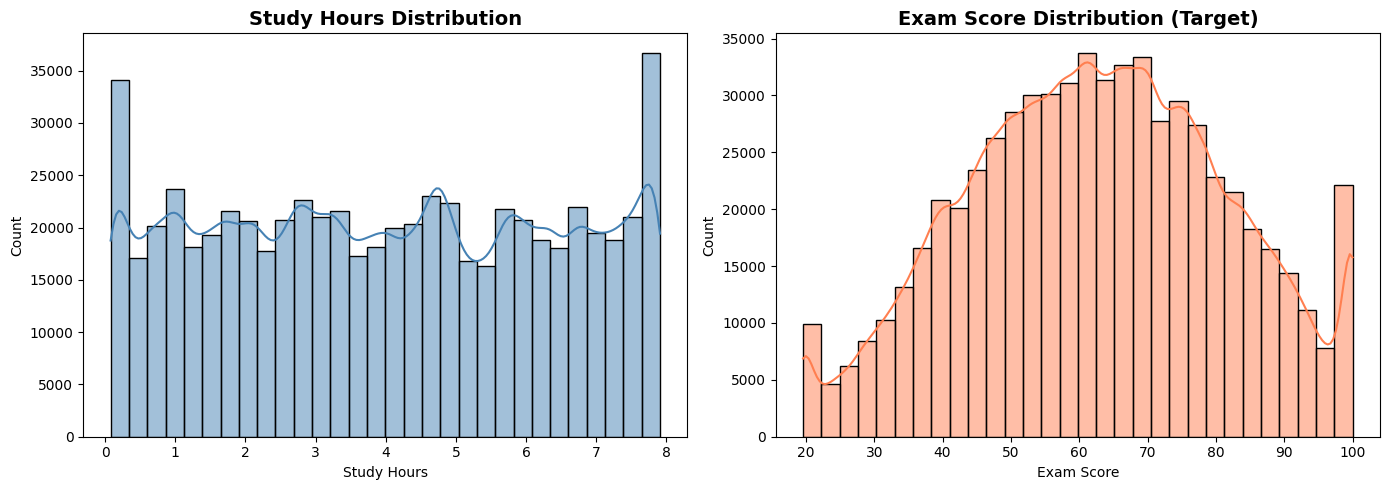

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# study_hours histogram
sns.histplot(data=train_df, x='study_hours', bins=30, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Study Hours Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Study Hours')
axes[0].set_ylabel('Count')

# exam_score histogram
sns.histplot(data=train_df, x='exam_score', bins=30, kde=True, ax=axes[1], color='coral')
axes[1].set_title('Exam Score Distribution (Target)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Exam Score')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

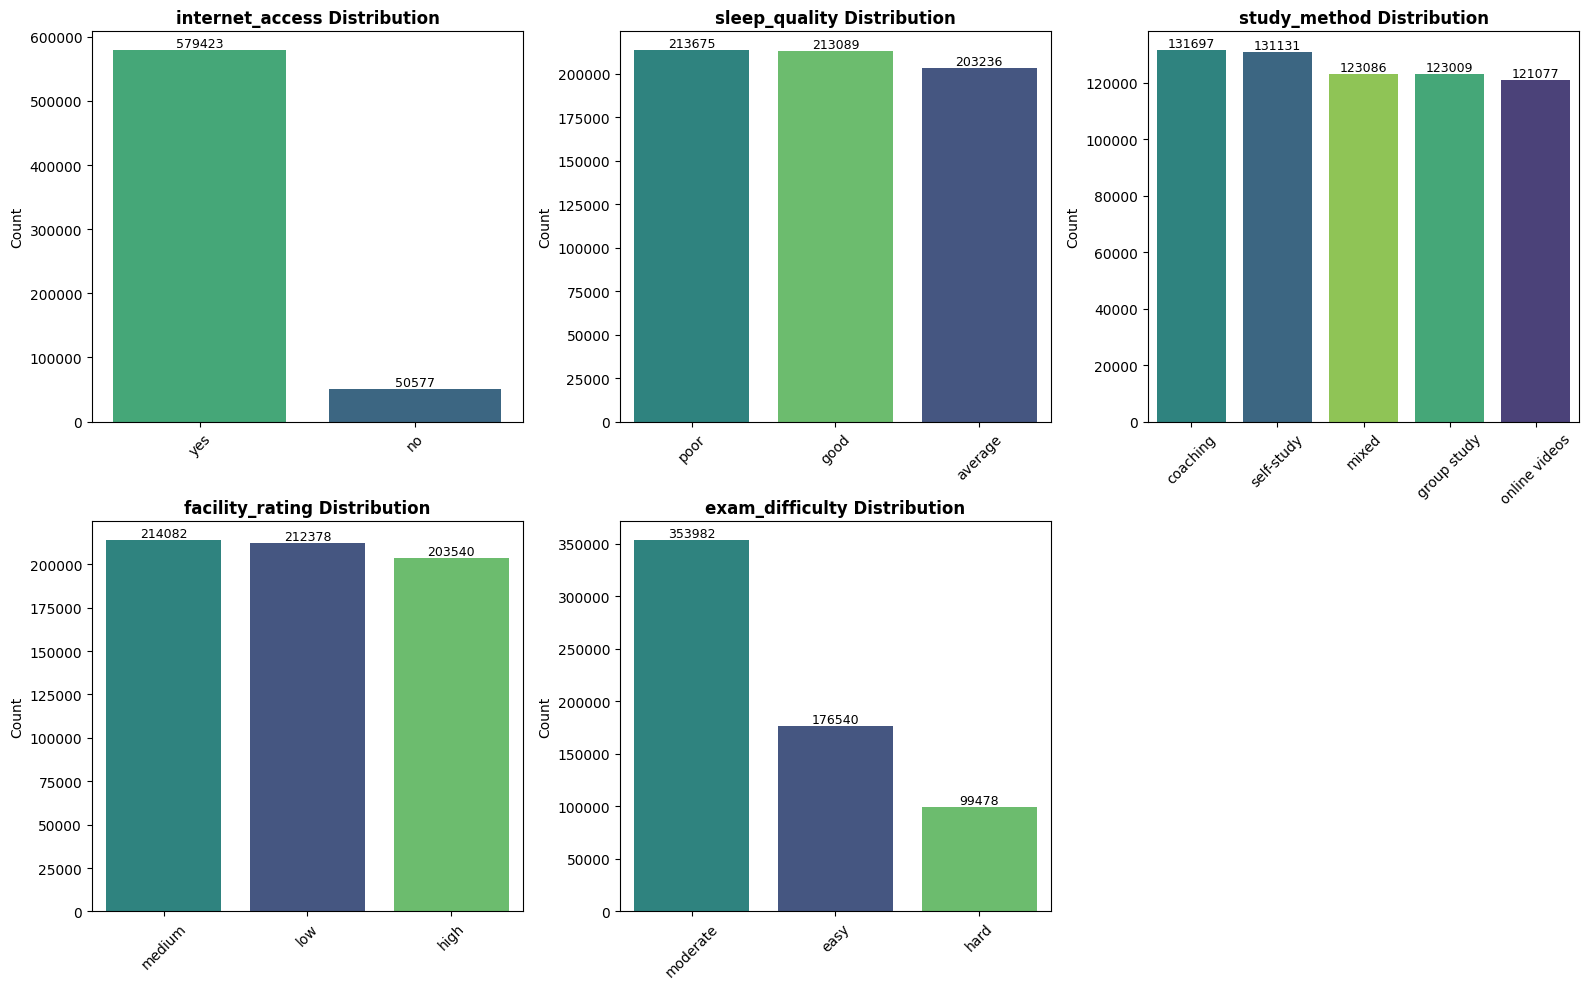

In [14]:
categorical_to_plot = ['internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

palette = 'viridis'

for i, col in enumerate(categorical_to_plot):
    sns.countplot(data=train_df, x=col, hue=col, ax=axes[i], palette=palette, 
                  order=train_df[col].value_counts().index, legend=False)
    axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', fontsize=9)

# Hide the empty 6th subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

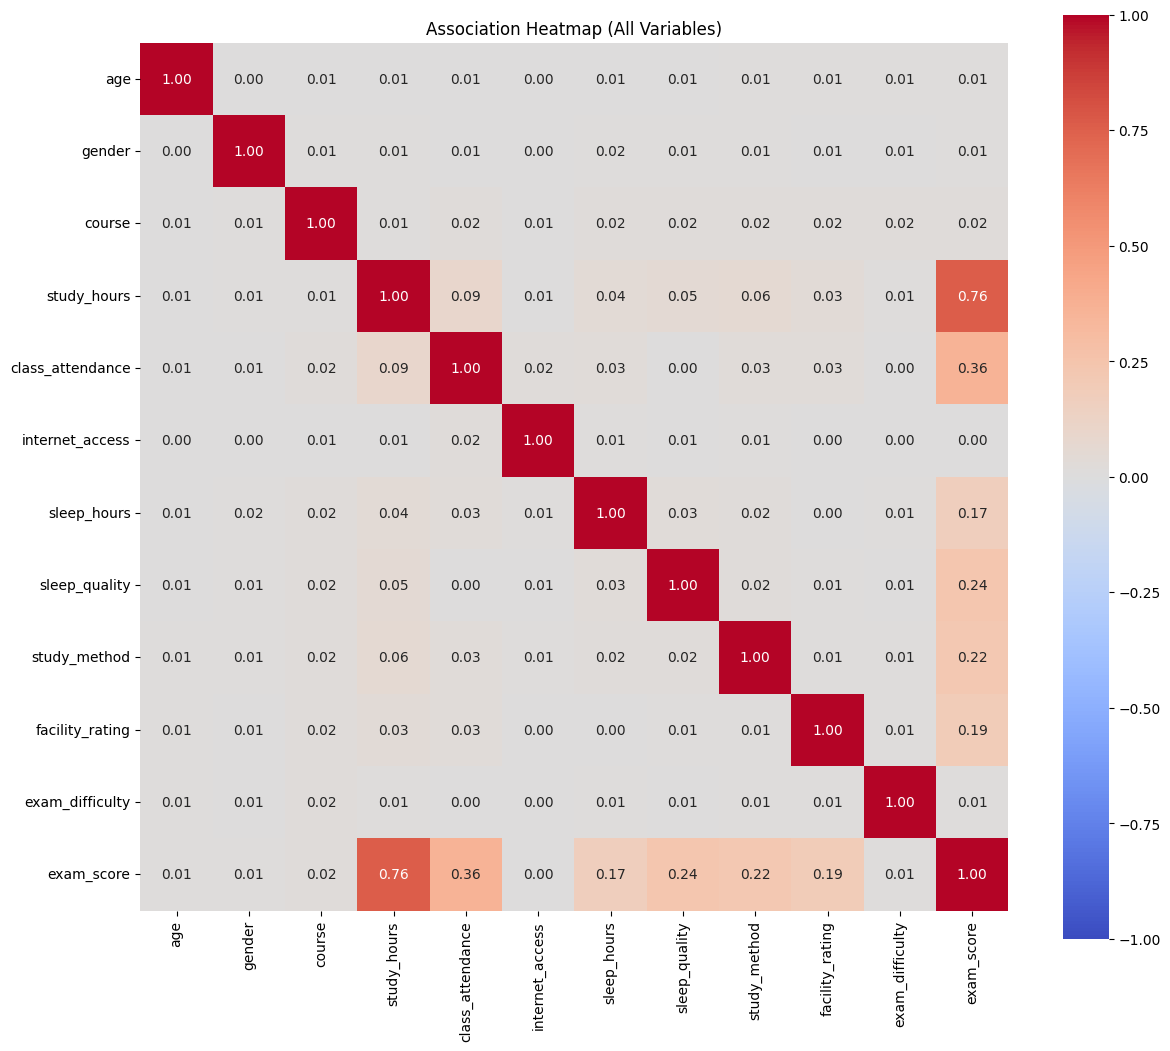

<Figure size 640x480 with 0 Axes>

In [18]:
df_for_assoc = train_df.drop('id', axis=1)

assoc = associations(
    df_for_assoc,
    nom_nom_assoc='cramer',      
    num_num_assoc='pearson',
    nom_num_assoc='correlation_ratio',  
    figsize=(14, 12),
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    title='Association Heatmap (All Variables)',
    plot=True
)
plt.tight_layout()
plt.show()